<a href="https://colab.research.google.com/github/ttalarico003/GCMachineLearning/blob/main/L07_TonyT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this example, we will be training a symbolic regression using genetic programming.  We will try to fit our model to a set of points.

To do this, we will use the library `gplearn` which we install and load with our other libraries below.


In [1]:
!pip install gplearn
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt
import numpy as np

Next we will create the function for our data and make our training and test data with the function `fitme`. Given an input `x`, our target function will be a simple cubic function: $\frac{x^3}{10} + x^2$.

We’ll make a training set `X_train` for this function consisting of 50 `uniform` random `xs` between -10 and 10. We run these points through our target `fitme` function to get the corresponding targets, `y_train`.


In [2]:
def fitme(x):
  return(0.1*x*x*x + x*x)

# Training samples
X_train = np.random.uniform(-10, 10, (50,1))
y_train = [fitme(X) for X in X_train]

# Testing samples
X_test = np.random.uniform(-10, 10, (50,1))
y_test = [fitme(X) for X in X_test]

We will plot the data below

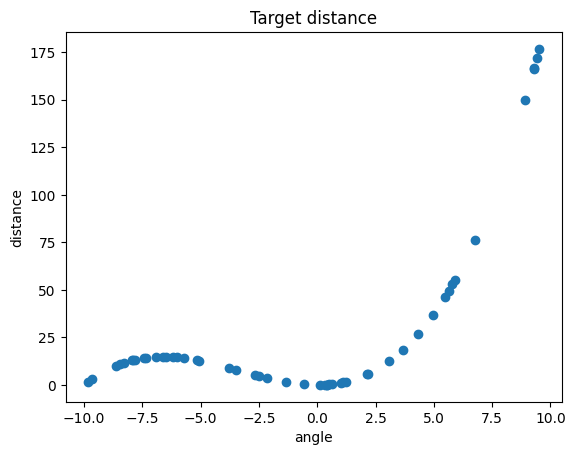

In [3]:
plt.scatter(X_train, y_train)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

Let's fit a model to this function using genetic programming. The “gplearn” package, first released in 2015, adopts the approach of the Scikit-Learn library and extends it to genetic programming. We install it and import it.

Our genetic-programming-based estimator, `est_gp` is a “symbolic regressor”. That is to say, we’re solving a regression problem by finding a symbolic expression --- a little piece of a program.

The program it finds will use only two operators: `add` for add and `mul` for multiply. A program can use as many of these operators as necessary. However, there’s a tradeoff in the search between accurately matching the training data and being parsimonious --- using a small expression.  The parsimony_coefficient tells the genetic programming search how much weight to put on parsimony compared to accuracy. Parsimony coefficient can be any non-negative value, where smaller numbers for parsimony tend to result in much bigger programs created.

In [4]:
est_gp = SymbolicRegressor(population_size=10000,parsimony_coefficient=0.1,
                           function_set=('add', 'mul'))
est_gp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SymbolicRegressor(function_set=('add', 'mul'), parsimony_coefficient=0.1,
                  population_size=10000)

We can now plot the performance of the model on the test set

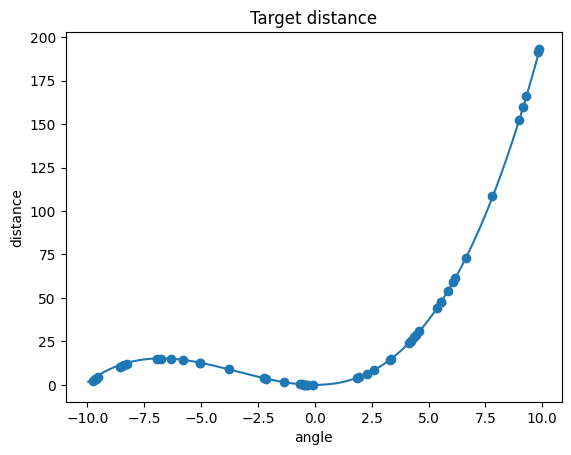

In [5]:
X_lots = np.reshape(np.sort(np.random.uniform(-10, 10, 250)),(-1,1))

y_gp = est_gp.predict(X_lots)

plt.scatter(X_test, y_test)
plt.plot(X_lots, y_gp)
plt.title('Target distance')
plt.xlabel('angle')
plt.ylabel('distance')
plt.show()

Finally we print the function learned by the genetic program below

In [6]:
print(est_gp._program)

add(mul(mul(-0.613, X0), mul(mul(-0.161, X0), X0)), mul(X0, X0))
